In [1]:
print("Hello world")

Hello world


In [2]:
import pandas as pd
from service_time_fake import *

c:\Users\matsb\OneDrive\Documents\Githubs\AI_ServiceTime_Report\service_time_fake.py:15: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if self.gross_weight is 69:
c:\Users\matsb\OneDrive\Documents\Githubs\AI_ServiceTime_Report\service_time_fake.py:56: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if self.postnr is "0690":


In [3]:
#class service_time:
  #def __init__(self, gross_weight, floor, can_use_trolley, has_elevator, postnr, predicted_st, actual_st):
      #self.gross_weight = gross_weight
      #self.floor = floor
      #self.can_use_trolley = can_use_trolley
      #self.has_elevator = has_elevator
      #self.postnr = postnr
      #self.predicted_st = predicted_st
      #self.actual_st = actual_st


In [4]:
service_time1 = service_time(2, 3, True, True, "0680", 3, 4)
service_time2 = service_time(20, 3, True, True, "0680", 11, 12)
service_time3 = service_time(40, 3, True, True, "0680", 15, 16)
service_time4 = service_time(10, 3, True, True, "0680", 7, 8)
service_time5 = service_time(15, 3, True, True, "0680", 8, 9)
service_time6 = service_time(90, 3, True, True, "0680", 17, 18)
service_time7 = service_time(500, 3, True, True, "0680", 59, 60)
service_time8 = service_time(120, 3, True, True, "0680", 19, 20)
service_time9 = service_time(50, 3, True, True, "0680", 17, 18)
service_time10 = service_time(43, 3, True, True, "0680", 15, 16)

service_time11 = service_time(30, 3, True, True, "0680", 12, 20)

In [5]:
df = [service_time1, service_time2, service_time3, service_time4, service_time5, service_time6, service_time7, service_time8, service_time9, service_time10]

for x in range (1, 100, 1):
    service_time_sample = service_time(None, 3, True, True, "0680", None, None)
    df.append(service_time_sample)

df = pd.DataFrame(vars(f) for f in df)

df.tail()

,gross_weight,floor,can_use_trolley,has_elevator,postnr,predicted_st,actual_st
104,96,3,True,True,0680,NaN,16
105,70,3,True,True,0680,NaN,13
106,3,3,True,True,0680,NaN,7
107,31,3,True,True,0680,NaN,10
108,42,3,True,True,0680,NaN,11


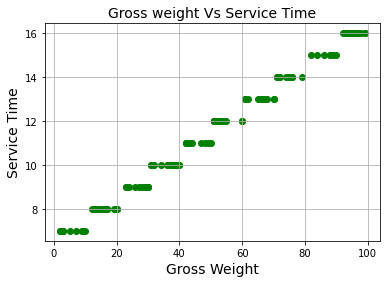

In [16]:
import matplotlib.pyplot as plt
df2 = df[df['gross_weight'] < 100]
plt.scatter(df2['gross_weight'], df2['actual_st'], color='green')
plt.title('Gross weight Vs Service Time', fontsize=14)
plt.xlabel('Gross Weight', fontsize=14)
plt.ylabel('Service Time', fontsize=14)
plt.grid(True)
plt.show()

In [6]:
from sklearn.model_selection import train_test_split 

X = df.drop(['predicted_st', 'actual_st'],axis=1) 
Y = df['actual_st']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.20, random_state=0)

In [7]:
from sklearn.linear_model import LinearRegression
reg_model = LinearRegression().fit(X_train, Y_train)
reg_predict = reg_model.predict(X_test) #Predictions on Testing data
print(reg_predict)

[14.82684778 11.15547204  9.07171824 10.46088744 16.31524335 10.75856656
 10.65934018 18.39899714 10.2624347  11.85005664 11.55237753  9.86552921
 10.46088744 13.04077309 12.44541487 15.02530052 11.75083027 15.62065875
 15.71988512 10.06398196 16.01756423 11.45315115]


In [8]:
X_test

,gross_weight,floor,can_use_trolley,has_elevator,postnr
84,84,3,True,True,0680
10,47,3,True,True,0680
75,26,3,True,True,0680
2,40,3,True,True,0680
24,99,3,True,True,0680
100,43,3,True,True,0680
108,42,3,True,True,0680
7,120,3,True,True,0680
16,38,3,True,True,0680
86,54,3,True,True,0680


In [9]:
df_test = [service_time11]
df_test = pd.DataFrame(vars(f) for f in df_test)
df_test = df_test.drop(['predicted_st', 'actual_st'],axis=1)
df_test

,gross_weight,floor,can_use_trolley,has_elevator,postnr
0,30,3,True,True,0680


In [10]:
Test1 = reg_model.predict(df_test)
Test1

array([9.46862373])

In [11]:
reg_model.score(X_train, Y_train)

0.9972407592498095

In [12]:
reg_model.score(X_test, Y_test)

0.9867879990197375

Fordi vi kun nå ser på en enkelt kunde, vil som oftest alle verdier utenom vekt forbli den samme.
Vi forventer derfor at modellen klarer å gjøre en bra prediction på enkelt kunder, så lenge kunden har fått nok leveringer til at dataen kan tolkes som mer eller mindre gyldig. 

In [13]:
df_testing = []

for x in range (1, 100, 1):
    service_time_sample = service_time(None, 3, True, True, "0680", None, None)
    df_testing.append(service_time_sample)

df_testing = pd.DataFrame(vars(f) for f in df_testing)
df_testing_actual = df_testing['actual_st']
df_testing = df_testing.drop(['predicted_st', 'actual_st'],axis=1)
df_testing['predicted_st'] = reg_model.predict(df_testing)

df_testing

,gross_weight,floor,can_use_trolley,has_elevator,postnr,predicted_st
0,25,3,True,True,0680,8.972492
1,22,3,True,True,0680,8.674813
2,14,3,True,True,0680,7.881002
3,93,3,True,True,0680,15.719885
4,4,3,True,True,0680,6.888738
...,...,...,...,...,...,...
94,91,3,True,True,0680,15.521432
95,2,3,True,True,0680,6.690285
96,19,3,True,True,0680,8.377134
97,23,3,True,True,0680,8.774039


In [14]:
df_testing['actual'] = df_testing_actual
df_testing

,gross_weight,floor,can_use_trolley,has_elevator,postnr,predicted_st,actual
0,25,3,True,True,0680,8.972492,9
1,22,3,True,True,0680,8.674813,9
2,14,3,True,True,0680,7.881002,8
3,93,3,True,True,0680,15.719885,16
4,4,3,True,True,0680,6.888738,7
...,...,...,...,...,...,...,...
94,91,3,True,True,0680,15.521432,16
95,2,3,True,True,0680,6.690285,7
96,19,3,True,True,0680,8.377134,8
97,23,3,True,True,0680,8.774039,9


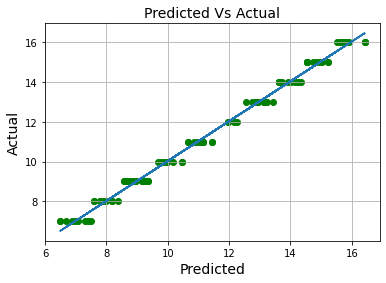

In [15]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(df_testing['predicted_st'], df_testing['actual'], color='green')

m, b = np.polyfit(df_testing['predicted_st'], df_testing['actual'], 1)
plt.plot(df_testing['predicted_st'], m*df_testing['predicted_st'] + b)

plt.title('Predicted Vs Actual', fontsize=14)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.grid(True)
plt.show()